# Import Libraries

In [ ]:
#Install NLTK library in Anaconda Prompt
!pip install nltk

In [22]:
# Install "wordcloud" library
!pip install wordcloud

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk 
nltk.download()
from nltk.book import*
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import itertools
from wordcloud import WordCloud 
from string import punctuation
from string import digits 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


# Import Data "Textdata.txt"

In [10]:
# Import data
textdata =  [line.rstrip() for line in open("Textdata.txt")]

In [13]:
textdata[0:10]

["films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before .",
 "for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen .",
 'to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd .',
 'the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .',
 "in other words , don't dismiss this film because of its source .",
 "if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes .",
 "getting the hughes brothers to direct t

In [14]:
textdata[3] # Displays the fourth line

'the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .'

# Convert Data to 'Corpus' and Do Essential Cleaning

In [15]:
corp = [item.lower() for item in textdata]
corp[3]

'the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes .'

In [16]:
# Removing punctuation marks like the commas, full stop, etc
remove_punc = str.maketrans('','', punctuation)
corp = [item.translate(remove_punc) for item in corp]
corp [3]

'the book  or  graphic novel   if you will  is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes '

In [17]:
# Removing numbers
remove_digits = str.maketrans('', '', digits)
corp = [item. translate(remove_digits) for item in corp]
corp[3]

'the book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes '

In [19]:
# Removing stopwords
stop_words = nltk.corpus.stopwords.words('english')
fs=[]
for item in corp:
    word_tokens = word_tokenize(item)
    filtered_sentence = [word for word in word_tokens if word not in
stop_words]
    fs.append(filtered_sentence)
fs[3]

['book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes']

In [20]:
# Remove words like 'includes','nearly'
newStopWords = ['includes','nearly',]
stop_words.extend(newStopWords) 
fs=[]
for item in corp:
    word_tokens = word_tokenize (item)
    filtered_sentence = [word for word in word_tokens if word not in
stop_words]
    fs.append(filtered_sentence)
fs[3]

['book',
 'graphic',
 'novel',
 'pages',
 'long',
 'consist',
 'nothing',
 'footnotes']

# Find top 20 words sorted by frequency.

In [24]:
# Flatterning the text
filtered_text= list(itertools.chain.from_iterable(fs))
fdist = nltk.FreqDist(filtered_text)

## Finding 20 most common words with highest frequency
fdist.most_common (20)

[('film', 10),
 ('like', 7),
 ('dont', 7),
 ('make', 7),
 ('even', 6),
 ('movie', 6),
 ('comic', 5),
 ('get', 5),
 ('pretty', 5),
 ('films', 4),
 ('world', 4),
 ('really', 4),
 ('say', 4),
 ('little', 4),
 ('good', 4),
 ('see', 4),
 ('one', 4),
 ('teen', 4),
 ('book', 3),
 ('moore', 3)]

#  Create a wordcloud using the textdata.txt

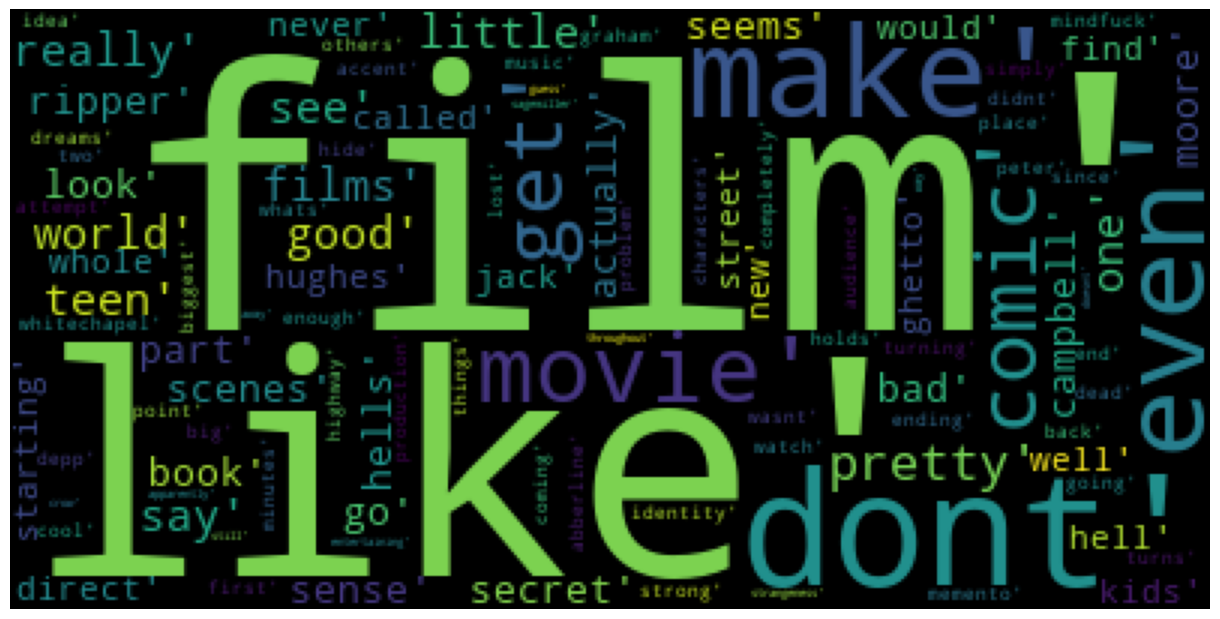

In [23]:
# Get Word Cloud
wordcloud = WordCloud(background_color="black").generate(str(filtered_text))
plt.figure(figsize = (12, 10))
plt.imshow(wordcloud); plt.axis("off")
plt.tight_layout(pad = 0); plt. show()


# List the number of lines having sentiments ‘Negative', 'Neutral’ and ‘Positive’.

In [27]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [30]:
# Read the text data
with open("Textdata.txt", "r", encoding="utf-8") as file:
    textdata = file.readlines()

# Create a DataFrame
df = pd.DataFrame(textdata, columns=['text'])

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each line
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Count the number of lines for each sentiment
sentiment_counts = df['sentiment_class'].value_counts()

# Display the results
print("Number of lines with 'Negative' sentiment:", sentiment_counts.get('Negative', 0))
print("Number of lines with 'Neutral' sentiment:", sentiment_counts.get('Neutral', 0))
print("Number of lines with 'Positive' sentiment:", sentiment_counts.get('Positive', 0))

Number of lines with 'Negative' sentiment: 21
Number of lines with 'Neutral' sentiment: 19
Number of lines with 'Positive' sentiment: 21


# Plot bar graph showing top 15 words by frequency.

In [31]:
# Feed in the top 15 most frequent words 
freqword = fdist.most_common(15)
freqword

[('film', 10),
 ('like', 7),
 ('dont', 7),
 ('make', 7),
 ('even', 6),
 ('movie', 6),
 ('comic', 5),
 ('get', 5),
 ('pretty', 5),
 ('films', 4),
 ('world', 4),
 ('really', 4),
 ('say', 4),
 ('little', 4),
 ('good', 4)]

In [32]:
# Transform the word distribution into a dataframe
words = pd.DataFrame(freqword)
words = words.rename(columns={0: 'Words',1: 'Freq'}) # it renames the columns
words

,Words,Freq
0,film,10
1,like,7
2,dont,7
3,make,7
4,even,6
5,movie,6
6,comic,5
7,get,5
8,pretty,5
9,films,4


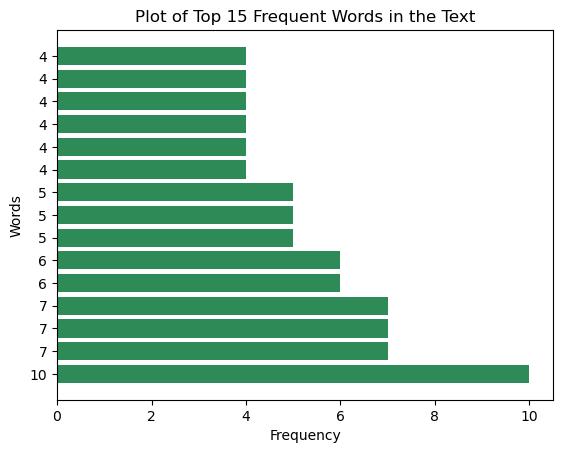

In [38]:
# Horizontal bar plot 
plotword=words.Words 
y=np.arange(len(plotword))
x=words.Freq
plt.barh(y, x, 
         align='center', 
         color = 'seagreen', 
         alpha=1)
plt.yticks(y, x);plt.ylabel('Words')
plt.xlabel('Frequency');
plt.title('Plot of Top 15 Frequent Words in the Text')
plt.show()